In [266]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
from scipy import stats
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Assessment 1: Part 1

<h3> 1. Load the dataset and explore the features and their ranges and distribution. Show a couple approaches you use.</h3>

In [268]:
#Columns/Features
D = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'] # Storing column names
R = 'Rings' # target variable
DR = D + [R]

#Loading Data set
abalone = pd.read_csv("abalone.csv", sep=',')
abalone.columns = DR

In [272]:
# Ranges and distribution of data
print(abalone.shape)
abalone[D].describe() 

(4176, 9)


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000


In [275]:
abalone[D].head() #displays first 5 rows

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [276]:
abalone[D].tail() #displays last 5 rows

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950


In [278]:
abalone[D].dtypes #data types of each column

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
dtype: object

In [281]:
abalone[D].info() # Summary of dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole_weight    4176 non-null   float64
 5   Shucked_weight  4176 non-null   float64
 6   Viscera_weight  4176 non-null   float64
 7   Shell_weight    4176 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.1+ KB


The last column labels 'Rings' can be used for prediction and classification problems.

In [282]:
abalone.Sex.value_counts() #display the values for male, infant and female of sex feature

M    1527
I    1342
F    1307
Name: Sex, dtype: int64

In [283]:
print("Unique Ring values:", pd.unique(abalone[R].sort_values())) #unique feature of target variable
display(abalone[R].describe())

Unique Ring values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29]


count    4176.000000
mean        9.932471
std         3.223601
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

<Figure size 432x432 with 0 Axes>

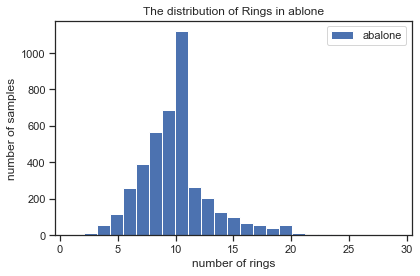

In [284]:
plt.figure(figsize=(6,6))
col='Rings'
abalone.hist(column=col, bins=25, label="abalone")

plt.title('The distribution of {} in ablone'.format(col)) #Observation for Ring data
plt.xlabel('number of rings')
plt.ylabel('number of samples')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()
plt.show()

This shows that our target variable has data which is not uniformly distributed.

# Assessment 1: Part 2

<h3>Is there any missing data? Present evidence or refer to figures or to earlier
tables or figures clearly (eg. by a figures/table name or by the jupyter line
number).</h3>

In [285]:
abalone.isnull() #check for null values

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4171,False,False,False,False,False,False,False,False,False
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False


In [286]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

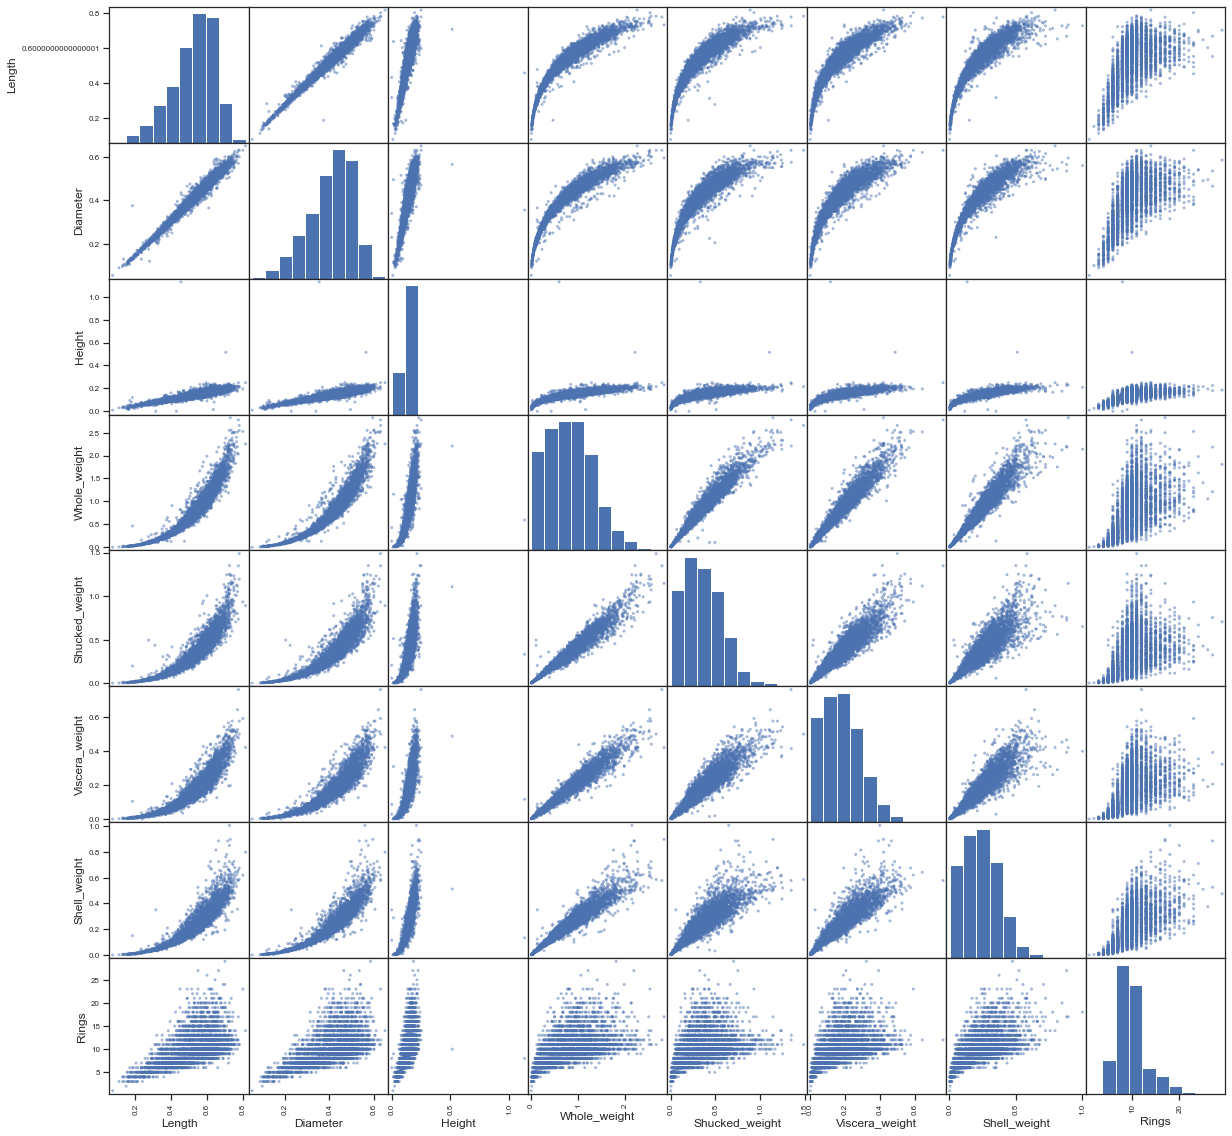

In [148]:
fig = pd.plotting.scatter_matrix(abalone, figsize=(20,20)) #displays scatter plot

From the above three cells, it can be seen there are no null values. There are no large holes in the scatterplot, hence there is no missing data.

# Assessment 1: Part 3
<h3> Compute the moments or summarization statistics on the data features.Comment on the diversity of data types and ranges of the features. </h3>

We will be using boxplot to check and display outliers if any.

In [287]:
abalone.nunique() #displays the count for unique values

Sex                  3
Length             134
Diameter           111
Height              51
Whole_weight      2429
Shucked_weight    1515
Viscera_weight     880
Shell_weight       926
Rings               28
dtype: int64

In [289]:
abalone_no_rings = abalone.drop(columns=['Rings'])

<AxesSubplot:>

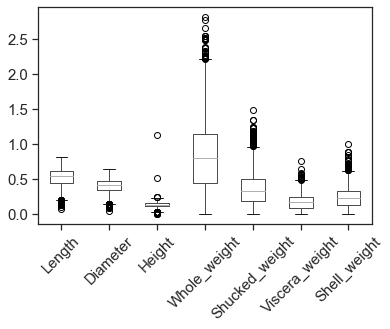

In [290]:
pd.plotting.boxplot(abalone_no_rings, grid=False, rot=45, fontsize=15) #boxplot for all the features except sex and Rings

<AxesSubplot:>

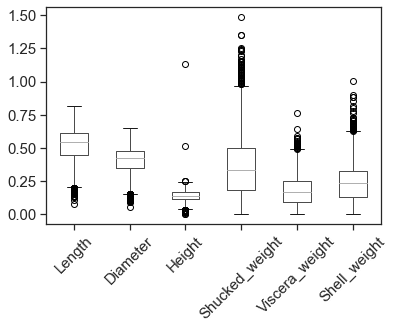

In [291]:
abalone_no_rings = abalone_no_rings.drop(columns=['Whole_weight'])
pd.plotting.boxplot(abalone_no_rings, grid=False, rot=45, fontsize=15) #boxplot for all the features except sex and Rings, whole_weight

Since we have a wide range for most of our data, we'll have to normalize our data before we proceed to prediction.

# Assessment 1: Part 4

<h3>Do there seem to be outliers that should be watched out for? Is it possible they are errors or just naturally occurring? How would you evaluate this? </h3>

The difference between mean and max for Height, Whole_weight, Shucked_weight, Viscera_weight & Shell_weight is large, while the difference is small for the features like Length and Diameter. So we will drop the columns of Lenght and Diameter in our analysis.

In [153]:
abalone_no_rld = abalone.drop(columns=['Rings', 'Length', 'Diameter'])

In [154]:
abalone_no_rld.describe()

,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000
mean,0.139527,0.828818,0.35940,0.180613,0.238852
std,0.041826,0.490424,0.22198,0.109620,0.139213
min,0.000000,0.002000,0.00100,0.000500,0.001500
25%,0.115000,0.441500,0.18600,0.093375,0.130000
50%,0.140000,0.799750,0.33600,0.171000,0.234000
75%,0.165000,1.153250,0.50200,0.253000,0.329000
max,1.130000,2.825500,1.48800,0.760000,1.005000


<AxesSubplot:xlabel='Height', ylabel='Rings'>

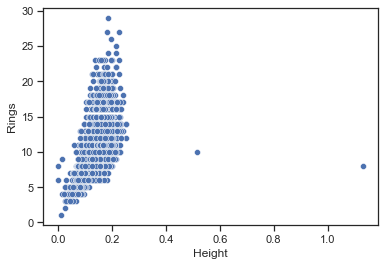

In [292]:
sns.scatterplot(data=abalone, x="Height", y="Rings")

It can be seen from the above scatter plot that the feature 'Height' contains outliers. It is possible that those two data point which are outliers, are errors, meaning they are not naturally occuring.

<AxesSubplot:xlabel='Whole_weight', ylabel='Rings'>

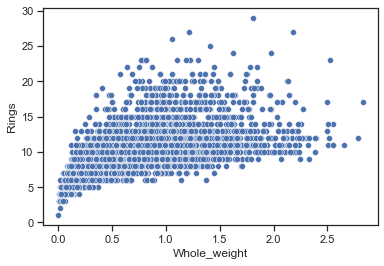

In [293]:
sns.scatterplot(data=abalone, x="Whole_weight", y="Rings")

It can be seen from the above scatter plot that the feature 'Whole_weight' contains outliers. It is possible that those data point which are outliers, are naturally occuring because they follow the trend of the graph.

<AxesSubplot:xlabel='Shucked_weight', ylabel='Rings'>

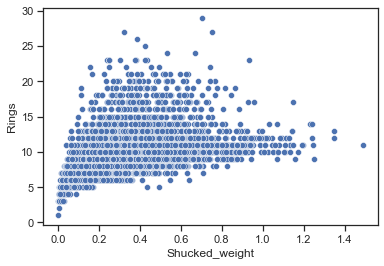

In [294]:
sns.scatterplot(data=abalone, x="Shucked_weight", y="Rings")

It can be seen from the above scatter plot that the feature 'Shucked_weight' contains outliers. It is possible that those data point which are outliers, are naturally occuring because they follow the trend of the graph.

<AxesSubplot:xlabel='Viscera_weight', ylabel='Rings'>

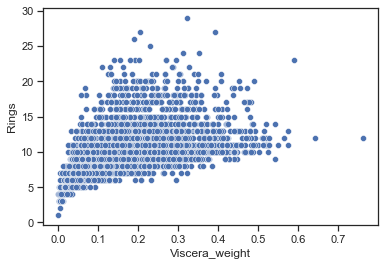

In [295]:
sns.scatterplot(data=abalone, x="Viscera_weight", y="Rings")

It can be seen from the above scatter plot that the feature 'Viscera_weight' contains outliers. It is possible that those data point which are outliers, are naturally occuring because they follow the trend of the graph.

<AxesSubplot:xlabel='Shell_weight', ylabel='Rings'>

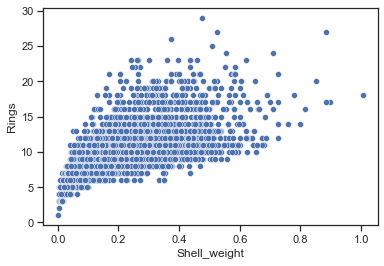

In [296]:
sns.scatterplot(data=abalone, x="Shell_weight", y="Rings")

It can be seen from the above scatter plot that the feature 'shell_weight' contains outliers. It is possible that those data point which are outliers, are naturally occuring because they follow the trend of the graph.

##### Conclusion: From the above analysis, we can say that only the Height column has outliers which are possible errors. The possibility of them being errors can be cross-verified with the source of the data. 
##### If they are errors, we can replace the outliers with mean height so that no information is lost.

# Assessment 1: Part 5

<h3> To check whether or not the dataset is balanced, we can check if data is uniformly distributed in the target variable. </h3>

In [297]:
abalone.Rings.unique() #gives unique values in target variable

array([ 7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 15, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

<Figure size 432x432 with 0 Axes>

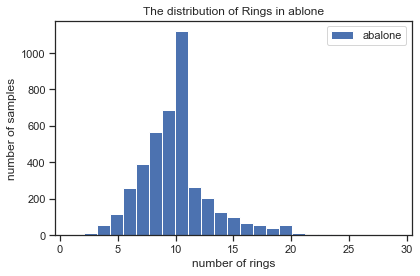

In [298]:
plt.figure(figsize=(6,6))
col='Rings'
abalone.hist(column=col, bins=25, label="abalone")

plt.title('The distribution of {} in ablone'.format(col))
plt.xlabel('number of rings')
plt.ylabel('number of samples')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()
plt.show()

From the above graph, it can be easily seen that data in target variable is not uniformly distributed. Hence, this is an unbalanced datset

# Assessment 1: Part 6
<h3> Assess the need for normalization and implement it.
You will normalize the data using two normalization levels min-max and
z-score normalization. </h3>

##### Part a

Yes, normalization is necessary because the here we can see in that description of data has different ranges, which suggests that our data values should be scaled between [0,1]. If the features have different scales, the distance between the pairs of samples would depend upon on the dimension that has higher values and it will overpower the other dimensions. This is impact the performance of the algorithm and make it bais towards the dimension with higher values. Hence we use Normalization.

###### Part b : Normalization of data
We will observe difference between our unnormalized data and normalized data.

There are two ways to normalize data:

1. Min Max Normalization: Basically, it scales data into the range [0,1]. Mathematically, it is defined as (x - x_min)/(x_max - x_min)

2. Z-Score: Z-score standardizes data such that the mean of the data becomes 0 and variance becomes 1. Mathematically, it is defined as (x - x_mean)/x_standard_deviation

Min-max normalization

All the featuers except 'Sex' in the abalone dataset are numerical, so we will convert this categorical data to numerical data using label encoding.

In [469]:
# Replacing the categorical data with numerical values using label encoding: M-0, F-1, I-2
abalone['Sex'].replace(['M','F','I'],[0,1,2],inplace=True)

Min-Max normalization is (sample-min)/(max-min) converting the min to 0 and max to 1

 
We will choose to normalize all the whole weight vs the dimensions of the dataset( length, height, diamter) and see the relation between them

In [470]:
# normalize entire dataset
min_max_data= (abalone-abalone.min())/(abalone.max()-abalone.min()) #min-max normalized data
min_max_data['Sex'] = abalone['Sex'] ## we should not normalize sex since it is catergorical
min_max_data['Rings'] = abalone['Rings'] ## target varaible should not be normalized 

Pandas applies the opeations column wise by default. min and max find the min and max of each column. After describing the dataset, we can see that the min and max for each variable is 0 and 1

In [471]:
min_max_data.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.955699,0.606768,0.593095,0.123475,0.292834,0.241022,0.237146,0.236524,9.932471
std,0.827782,0.162301,0.166806,0.037015,0.173693,0.149280,0.144332,0.138727,3.223601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.506757,0.495798,0.101770,0.155658,0.124412,0.122284,0.128052,8.000000
50%,1.000000,0.635135,0.621849,0.123894,0.282539,0.225286,0.224490,0.231689,9.000000
75%,2.000000,0.729730,0.714286,0.146018,0.407739,0.336920,0.332456,0.326358,11.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000


Above is the Min-Max normalized data. We will first compute the Z-score normalized data, and then compare the results for three different features

###### Part c

Z-score normalization

In [472]:
abalone_zscore= abalone.apply(stats.zscore) # zscore normalized data
abalone_zscore['Sex'] = abalone['Sex'] ## we should not normalize sex since it is catergorical
abalone_zscore['Rings'] = abalone['Rings'] ## target variable should not be normalized 

In [473]:
abalone_zscore.describe()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4176.000000,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4176.000000
mean,0.955699,-7.146263e-16,2.041789e-16,-8.167158e-17,-6.805965e-18,-2.007760e-16,-5.785070e-17,-2.382088e-17,9.932471
std,0.827782,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,3.223601
min,0.000000,-3.738991e+00,-3.556025e+00,-3.336261e+00,-1.686127e+00,-1.614754e+00,-1.643254e+00,-1.705166e+00,1.000000
25%,0.000000,-6.162857e-01,-5.833625e-01,-5.864718e-01,-7.898559e-01,-7.812450e-01,-7.959109e-01,-7.820068e-01,8.000000
50%,1.000000,1.747997e-01,1.723991e-01,1.130858e-02,-5.927735e-02,-1.054267e-01,-8.770096e-02,-3.485830e-02,9.000000
75%,2.000000,7.577048e-01,7.266242e-01,6.090889e-01,6.616145e-01,6.424789e-01,6.604242e-01,6.476332e-01,11.000000
max,2.000000,2.423148e+00,2.439684e+00,2.368341e+01,4.071831e+00,5.084858e+00,5.286027e+00,5.504099e+00,29.000000


Here we have made a comparison of **Length, Diameter & Height with Whole_weight**  with respect to original data, min-max normalized and z-score normalized data

In [474]:
ablone_data_weight= abalone[['Whole_weight', 'Length', 'Diameter', 'Height']]
ablone_data_weight.sort_values(by='Whole_weight',inplace=True) ## sorting to see the pattern from min to max
ablone_data_weight.describe()

,Whole_weight,Length,Diameter,Height
count,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.828818,0.524009,0.407892,0.139527
std,0.490424,0.120103,0.099250,0.041826
min,0.002000,0.075000,0.055000,0.000000
25%,0.441500,0.450000,0.350000,0.115000
50%,0.799750,0.545000,0.425000,0.140000
75%,1.153250,0.615000,0.480000,0.165000
max,2.825500,0.815000,0.650000,1.130000


<AxesSubplot:title={'center':'Unnormalized data : Whole_weight VS Length/Diameter/Height'}, xlabel='Whole_weight'>

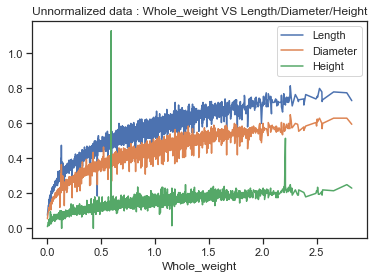

In [475]:
ablone_data_weight.plot(x='Whole_weight',y=['Length', 'Diameter', 'Height'], title = 'Unnormalized data : Whole_weight VS Length/Diameter/Height')

The plot above of whole weight vs length, diameter and height is not normalized

In [476]:
ablone_data_weight_min_max= min_max_data[['Whole_weight', 'Length', 'Diameter', 'Height']]
ablone_data_weight_min_max.sort_values(by='Whole_weight',inplace=True) ## sorting to see the pattern from min to max
ablone_data_weight_min_max.describe()

,Whole_weight,Length,Diameter,Height
count,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.292834,0.606768,0.593095,0.123475
std,0.173693,0.162301,0.166806,0.037015
min,0.000000,0.000000,0.000000,0.000000
25%,0.155658,0.506757,0.495798,0.101770
50%,0.282539,0.635135,0.621849,0.123894
75%,0.407739,0.729730,0.714286,0.146018
max,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:title={'center':'Min-Max normalized data : Whole_weight VS Length/Diameter/Height'}, xlabel='Whole_weight'>

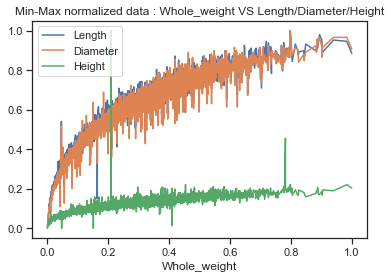

In [477]:
ablone_data_weight_min_max.plot(x='Whole_weight',y=['Length', 'Diameter', 'Height'], title = 'Min-Max normalized data : Whole_weight VS Length/Diameter/Height')

We can see that the all the features fall in the same range ( 0 to 1). As compared to unnormalized dataset, we can see that diamter and length almost overlap

In [478]:
ablone_data_weight_zscore= abalone_zscore[['Whole_weight', 'Length', 'Diameter', 'Height']]
ablone_data_weight_zscore.sort_values(by='Whole_weight',inplace=True) ## sorting to see the pattern from min to max
ablone_data_weight_zscore.describe()

,Whole_weight,Length,Diameter,Height
count,4176.000000,4.176000e+03,4.176000e+03,4.176000e+03
mean,0.000000,-7.078203e-16,2.177909e-16,-1.088954e-16
std,1.000120,1.000120e+00,1.000120e+00,1.000120e+00
min,-1.686127,-3.738991e+00,-3.556025e+00,-3.336261e+00
25%,-0.789856,-6.162857e-01,-5.833625e-01,-5.864718e-01
50%,-0.059277,1.747997e-01,1.723991e-01,1.130858e-02
75%,0.661614,7.577048e-01,7.266242e-01,6.090889e-01
max,4.071831,2.423148e+00,2.439684e+00,2.368341e+01


<AxesSubplot:title={'center':'Zscore normalized data : Whole_weight VS Length/Diameter/Height'}, xlabel='Whole_weight'>

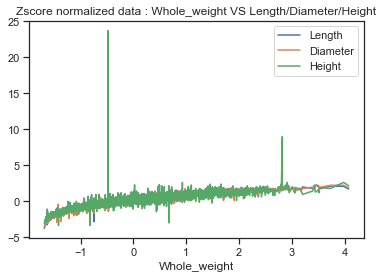

In [479]:
ablone_data_weight_zscore.plot(x='Whole_weight',y=['Length', 'Diameter', 'Height'], title = 'Zscore normalized data : Whole_weight VS Length/Diameter/Height')

We can see that the all the features fall in the same range ( 0 to 1). As compared to unnormalized dataset, we can see that diamter and length almost overlap

Conclusion: For the unnormalized data, all the three parameters: Length, Diameter, Height has different ranges, while min-max normalized data shows that the parameters length and diameter have similar range and values and Height has slightly different values. In case of Z-score normalized data, all the three parameters have similar properties.

# Assessment 2: Part 1 (with Abalone dataset)

### Part 1 & Part 2 are combined in the answer

In [480]:
# Removal of unnecessary column data which contains entries like 'Un-Normalized', 'Min-Max_normalized' and 'Z-score_normalized'
min_max_data = min_max_data.iloc[:,:-1]
abalone_zscore = abalone_zscore.iloc[:,:-1]

We use scikit learn's train_test_split() function to split our z score normalised dataset into training and testing data using random_state = 27 and testing set size= 20%.

In [481]:
min_max_data['Rings'] = abalone.Rings
abalone_zscore['Rings'] = abalone.Rings

# List of all the datasets: Un-normalized dataset(abalone), Min-Max normalized data (min_max_data),
# Z-score normalized data (abalone_zscore)
all_datasets = [abalone, abalone_zscore, min_max_data]
Datasets_Name = ["Un-normalized data", "Z-score normalized", "Min-Max normalized"] #Column names of the above mentioned datasets

#List of Train and Test Accuracies for all versions 
train_accuracies = []
test_accuracies = []
overall_accuracies = []

print("     Training Accuracy     Testing Accuracy     Overall Accuracy     Version Name\n")

index=0
for dataset in all_datasets:
    X_temp = dataset.iloc[:,:-1]
    Y_temp = dataset[dataset.columns[-1]]
    
    # Split into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=27)
    
    #Defining KNN Classifier with default parameter
    KNN_model = KNeighborsClassifier()
    KNN_model.fit(X_train, Y_train)
    
    Y_train_pred = KNN_model.predict(X_train) #predicting training data
    Y_test_pred = KNN_model.predict(X_test) #predicting testing data
    Y_pred = KNN_model.predict(X_temp)
    
    train_accuracies.append(accuracy_score(Y_train, Y_train_pred))
    test_accuracies.append(accuracy_score(Y_test, Y_test_pred))
    overall_accuracies.append(accuracy_score(Y_temp,Y_pred))
     
    print("%3d) %10.4f         %10.4f           %12.4f           %s"%(index,train_accuracies[index],test_accuracies[index], overall_accuracies[index],Datasets_Name[index]))
    index+=1
   


     Training Accuracy     Testing Accuracy     Overall Accuracy     Version Name

  0)     0.4473             0.2333                 0.4045           Un-normalized data
  1)     0.4314             0.2273                 0.3906           Z-score normalized
  2)     0.4506             0.2440                 0.4092           Min-Max normalized


###### Since Min-Max normalization has the best overall accuracy, we will apply KNN classification on the Min-Max normalized dataset

#### Training model with classifier's default parameters

We import KNeighborsClassifier() from sklearn.neighbors and fit it to the training data. For default param of KNN, the k is 5.

In [482]:
X = min_max_data.iloc[:,:-1]
Y = min_max_data[min_max_data.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

# Define default KNN Classifier
KNN_model = KNeighborsClassifier()

# Fit train data into the model
KNN_model.fit(X_train, Y_train)

# Get parameters of the model
print("The default parameters for KNeighborClassifier is as follows:")
KNN_model.get_params()

The default parameters for KNeighborClassifier is as follows:


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Checking the training and testing accuracies using Default weighted KNN classifier

In [483]:
# Prediction on train set
Y_train_pred = KNN_model.predict(X_train)

# Prediction on test set
Y_test_pred = KNN_model.predict(X_test)

# Train Accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)

#Test Accuracy
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy of this model is :",train_accuracy)
print("Test Accuracy of this model is :",test_accuracy)

Train Accuracy of this model is : 0.4505988023952096
Test Accuracy of this model is : 0.24401913875598086


### Part 3: Checking for best value of K for testing accuracies using Default weighted KNN classifier

In [484]:
# Dictionary of accuracy scores and variance for each value of K
accuracy_scores=[]

# Train Model for each value of K
for n in range(1,100):
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    knn_classifier.fit(X_train,Y_train)
    Y_test_pred = knn_classifier.predict(X_test) # Prediction on test set
    accuracy_scores.append(accuracy_score(Y_test, Y_test_pred))

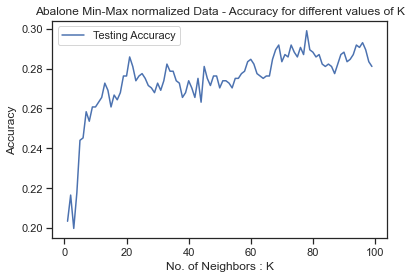

In [485]:
# Generate plot
plt.title('Abalone Min-Max normalized Data - Accuracy for different values of K')
plt.plot(range(1, 100), accuracy_scores[0:], label = 'Testing Accuracy')
plt.legend()
plt.xlabel('No. of Neighbors : K')
plt.ylabel('Accuracy')
plt.show()

In [486]:
max_index= np.where(accuracy_scores == max(accuracy_scores))
print("Max accuracy:",max(accuracy_scores))

Max accuracy: 0.29904306220095694


At K = 78, the model works best, with accuracy of 29.9%. Also it can be seen that there is no linear relationship between K and accuracy.

### Part 4: Weighted KNN

Let's observe variation of **Weighted KNN** and whether or not it improves the performance of the model.

Here, the **weight** of the KNN is inverse of **distance**.
1. **Euclidean Distance**: The default metrics for distance is "Minkowski". So, if we specify p=2, then it is "Euclidean" distance (L2)
2. **Manhattan Distance**: The default metrics for distance is "Minkowski". So, if we specify p=1, then it is "Manhattan" distance (L1)
3. **User defined function for distance metrics**

### Weighted KNN : Euclidean Distance

In [487]:
# Defining KNN model with the best found value of paramter K=78
euclidean_weighted_knn_model = KNeighborsClassifier(weights='distance', n_neighbors=78, p=2)

# Fitting Train data into our model
euclidean_weighted_knn_model.fit(X_train,Y_train)

# Predict on train data set
Y_train_pred = euclidean_weighted_knn_model.predict(X_train)

# Predict on test data set
Y_test_pred = euclidean_weighted_knn_model.predict(X_test)

print("The values of different metrics for our euclidean_weighted KNN model is as follows:")

print("Train Accuracy: ", accuracy_score(Y_train,Y_train_pred))
print("Test Accuracy:  ", accuracy_score(Y_test,Y_test_pred))


The values of different metrics for our euclidean_weighted KNN model is as follows:
Train Accuracy:  1.0
Test Accuracy:   0.2930622009569378


### Weighted KNN : Manhattan Distance 

In [488]:
#Defining KNN model with the best found value of paramter K =78
manhattan_weighted_knn_model = KNeighborsClassifier(weights='distance', n_neighbors=78, p=1)

# Fitting Train data into our model
manhattan_weighted_knn_model.fit(X_train,Y_train)

# Predict on train data set
Y_train_pred = manhattan_weighted_knn_model.predict(X_train)

# Predict on test data set
Y_test_pred = manhattan_weighted_knn_model.predict(X_test)

print("The values of different metrics for our manhattan_weighted KNN model is as follows:")

print("Train Accuracy: ", accuracy_score(Y_train,Y_train_pred))
print("Test Accuracy:  ", accuracy_score(Y_test,Y_test_pred))

The values of different metrics for our manhattan_weighted KNN model is as follows:
Train Accuracy:  1.0
Test Accuracy:   0.28827751196172247


### Weighted KNN : Default values

In [489]:
# Defining KNN model with the default parameters
default_weighted_knn_model = KNeighborsClassifier()

# Fitting Train data into our model
default_weighted_knn_model.fit(X_train,Y_train)

# Predict on train data set
Y_train_pred = default_weighted_knn_model.predict(X_train)

# Predict on test data set
Y_test_pred = default_weighted_knn_model.predict(X_test)

print("The values of different metrics for our default_weighted KNN model is as follows:")

print("Train Accuracy: ", accuracy_score(Y_train,Y_train_pred))
print("Test Accuracy:  ", accuracy_score(Y_test,Y_test_pred))

The values of different metrics for our default_weighted KNN model is as follows:
Train Accuracy:  0.4505988023952096
Test Accuracy:   0.24401913875598086


### Comparison of all three models: Default, Euclidean weight & Manhattan weight KNN classifier

In [490]:
# List of all KNN models generated
knn_models=[default_weighted_knn_model, euclidean_weighted_knn_model, manhattan_weighted_knn_model]
knn_models_names = ["Default KNN", "Weighted KNN - Euclidean Distance Metric", "Weighted KNN - Manhattan Distance Metric"]
index=0
print("Computation Performance for each KNN model:")
for knn in knn_models:
    print("\n-------------------------------------------------\n",knn_models_names[index])
    temp_scores = cross_validate(knn,X,Y)
    for key in temp_scores:
        print(key,"::",temp_scores[key].mean())
    
    index+=1

Computation Performance for each KNN model:

-------------------------------------------------
 Default KNN
fit_time :: 0.004395437240600586
score_time :: 0.02173604965209961
test_score :: 0.23348508724178435

-------------------------------------------------
 Weighted KNN - Euclidean Distance Metric
fit_time :: 0.004003190994262695
score_time :: 0.027785110473632812
test_score :: 0.2655734464086182

-------------------------------------------------
 Weighted KNN - Manhattan Distance Metric
fit_time :: 0.0037970542907714844
score_time :: 0.02610950469970703
test_score :: 0.2622212990287368


In [491]:
# Dictionary of accuracy scores and variance for each value of K
accuracy_scores_0=[]
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    default_weighted_knn_model = KNeighborsClassifier(n)
    default_weighted_knn_model.fit(X_train,Y_train)
    Y_test_pred = default_weighted_knn_model.predict(X_test)
    accuracy_scores_0.append(accuracy_score(Y_test, Y_test_pred))

In [492]:
# Dictionary of accuracy scores and variance for each value of K
accuracy_scores_1=[]
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    euclidean_weighted_knn_model = KNeighborsClassifier(weights='distance', n_neighbors=n, p=2)
    euclidean_weighted_knn_model.fit(X_train, Y_train)
    Y_test_pred = euclidean_weighted_knn_model.predict(X_test)
    accuracy_scores_1.append(accuracy_score(Y_test, Y_test_pred))

In [493]:
# Dictionary of accuracy scores and variance for each value of K
accuracy_scores_2=[]
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    manhattan_weighted_knn_model = KNeighborsClassifier(weights='distance', n_neighbors=n, p=1)
    manhattan_weighted_knn_model.fit(X_train,Y_train)
    Y_test_pred = manhattan_weighted_knn_model.predict(X_test)
    accuracy_scores_2.append(accuracy_score(Y_test, Y_test_pred))

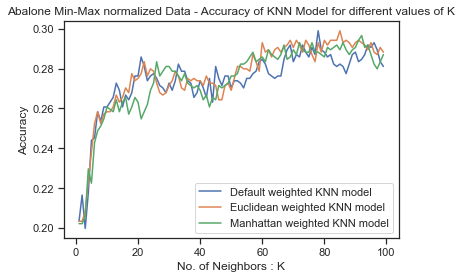

In [494]:
# Generate plot
plt.title('Abalone Min-Max normalized Data - Accuracy of KNN Model for different values of K')
plt.plot(range(1, 100), accuracy_scores_0[0:], label = 'Default weighted KNN model')
plt.plot(range(1, 100), accuracy_scores_1[0:], label = 'Euclidean weighted KNN model')
plt.plot(range(1, 100), accuracy_scores_2[0:], label = 'Manhattan weighted KNN model')
plt.legend()
plt.xlabel('No. of Neighbors : K')
plt.ylabel('Accuracy')
plt.show()

In [495]:
print("Max accuracy for default :",max(accuracy_scores_0[1:])*100,"% K value:",k_value[np.where(accuracy_scores_0 == max(accuracy_scores_0[1:]))][0])
print("Max accuracy for euclid:",max(accuracy_scores_1[1:])*100,"% K value:",k_value[np.where(accuracy_scores_1 == max(accuracy_scores_1[1:]))][0])
print("Max accuracy for manhattan :",max(accuracy_scores_2[1:])*100,"% K value:",k_value[np.where(accuracy_scores_2 == max(accuracy_scores_2[1:]))][0])

Max accuracy for default : 29.904306220095695 % K value: 77.0
Max accuracy for euclid: 29.904306220095695 % K value: 84.0
Max accuracy for manhattan : 29.665071770334926 % K value: 91.0


It can be seen from the above graph, we get the maximum accuracy using Default weighted KNN model.

### Conclusion:
The best parameter for KNN Classifier Abalone Dataset is by using Manhattan weighted model with **k = 77** and **weight = "uniform"** and **Accuracy = 29.9%**

### Part 5: Ablation studies for Abalone dataset

In [496]:
# This is the unnormalized data
unnormalized_data = abalone

X = unnormalized_data.iloc[:,:-1]
Y = unnormalized_data[unnormalized_data.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27)

# Define default KNN Classifier
KNN_model = KNeighborsClassifier()

# Fit train data into the model
KNN_model.fit(X_train, Y_train)

# Get parameters of the model
print("The default parameters for KNeighborClassifier is as follows:")
KNN_model.get_params()

The default parameters for KNeighborClassifier is as follows:


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [497]:
# Prediction on train set
Y_train_pred = KNN_model.predict(X_train)

# Prediction on test set
Y_test_pred = KNN_model.predict(X_test)

# Train Accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)

#Test Accuracy
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy of this model is :",train_accuracy)
print("Test Accuracy of this model is :",test_accuracy)

Train Accuracy of this model is : 0.4473053892215569
Test Accuracy of this model is : 0.2332535885167464


In [498]:
# Dictionary of accuracy scores and variance for each value of K
accuracy_scores_3=[]
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    default_weighted_knn_model = KNeighborsClassifier(n)
    default_weighted_knn_model.fit(X_train,Y_train)
    Y_test_pred = default_weighted_knn_model.predict(X_test)
    accuracy_scores_3.append(accuracy_score(Y_test, Y_test_pred))

In [499]:
# Dictionary of accuracy scores and variance for each value of K
accuracy_scores_4=[]
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    euclidean_weighted_knn_model = KNeighborsClassifier(weights='distance', n_neighbors=n, p=2)
    euclidean_weighted_knn_model.fit(X_train,Y_train)
    Y_test_pred = euclidean_weighted_knn_model.predict(X_test)
    accuracy_scores_4.append(accuracy_score(Y_test, Y_test_pred))

In [534]:
# Dictionary of accuracy scores and variance for each value of K
accuracy_scores_5=[]
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    manhattan_weighted_knn_model = KNeighborsClassifier(weights='distance', n_neighbors=n, p=1)
    manhattan_weighted_knn_model.fit(X_train,Y_train)
    Y_test_pred = manhattan_weighted_knn_model.predict(X_test)
    accuracy_scores_5.append(accuracy_score(Y_test, Y_test_pred))

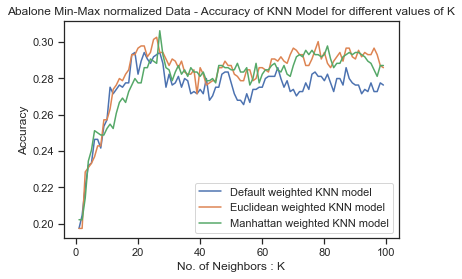

In [501]:
# Generate plot
plt.title('Abalone Min-Max normalized Data - Accuracy of KNN Model for different values of K')
plt.plot(range(1,100), accuracy_scores_3[0:], label = 'Default weighted KNN model')
plt.plot(range(1,100), accuracy_scores_4[0:], label = 'Euclidean weighted KNN model')
plt.plot(range(1,100), accuracy_scores_5[0:], label = 'Manhattan weighted KNN model')
plt.legend()
plt.xlabel('No. of Neighbors : K')
plt.ylabel('Accuracy')
plt.show()

In [502]:
print("Max accuracy for default :",max(accuracy_scores_3[1:])*100,"% K value:",k_value[np.where(accuracy_scores_3 == max(accuracy_scores_3[1:]))][0])
print("Max accuracy for euclid:",max(accuracy_scores_4[1:])*100,"% K value:",k_value[np.where(accuracy_scores_4 == max(accuracy_scores_4[1:]))][0])
print("Max accuracy for manhattan :",max(accuracy_scores_5[1:])*100,"% K value:",k_value[np.where(accuracy_scores_5 == max(accuracy_scores_5[1:]))][0])

Max accuracy for default : 29.42583732057416 % K value: 18.0
Max accuracy for euclid: 30.263157894736842 % K value: 25.0
Max accuracy for manhattan : 30.62200956937799 % K value: 26.0


### Conclusion:
Best value for Default weighted KNN model is K = 18, with accuracy 29.42%.
Best value for Euclidean weighted KNN model is K = 25, with accuracy 30.26%.
Best value for Manhattan weighted KNN model is K = 26, with accuracy 30.62%

77 29

The best parameter for KNN Classifier Abalone Dataset without normalization is **k = 26** and **weight = "distance"**. This can also be seen in the graph, as Manhattan weighted KNN model has the best accuracy at **k = 26**, which is **30.62%**

**This shows that normalization in this case does not make any major impact on the prediction accuracy. The accuracy we got for normalized data is 29% with k = 77, and for unnormalized data accuracy is 30.62% with k = 26**

# Assessment 2: Part 1 (with Wine dataset)

Part a and Part b are combined in the answer

In [503]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = [C] + DL

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')

#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')

wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r], ignore_index=True)
wine_no_quality = wine.drop(columns='quality')

[6 5 7 8 4 3 9]


array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

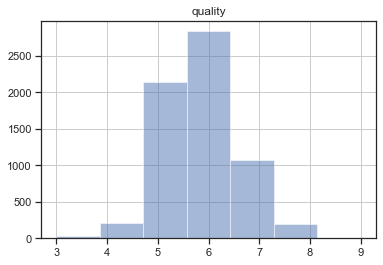

In [509]:
print(wine.quality.unique())
wine.hist(column='quality', bins=7, alpha=0.5, label="red")

As we can see that distribution of quality is not uniform and hence the dataset is not balanced

In [507]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 660.0 KB


All columns are numeric, red wine is indicated as 1, white wine is indicated as 0 in the color column.

We will observe difference between our unnormalized data and data after normalization.

There are two ways to normalize data:

1. Min Max Normalization: Basically, it scales data into the range [0,1]. Mathematically, it is defined as (x - x_min)/(x_max - x_min)

2. Z-Score: Z-score standardizes data such that the mean of the data becomes 0 and variance becomes 1. Mathematically, it is defined as (x - x_mean)/x_standard_deviation

#### Min-Max normalization on wine dataset

In [510]:
X_dropna = wine_no_quality
wine_MinMaxScaler = MinMaxScaler()
min_max_wine_data = pd.DataFrame(wine_MinMaxScaler.fit_transform(X_dropna))

#adding column names in the generated data
min_max_wine_data.columns = wine_no_quality.columns.values

In [511]:
min_max_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.246114
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Z-score normalization on Wine dataset

In [512]:
wine_zscore = (X_dropna-X_dropna.mean())/X_dropna.std()

In [513]:
wine_zscore.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,2.099803e-16,-2.449770e-16,3.499672e-17,3.499672e-17,-3.499672e-17,-8.749179e-17,0.000000,-3.517170e-15,2.720995e-15,2.099803e-16,-1.994813e-15,-3.499672e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.634386e+00,-1.577208e+00,-2.192664e+00,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00,-5.713226e-01
25%,-6.288845e-01,-6.661100e-01,-4.722972e-01,-7.657389e-01,-5.147590e-01,-7.620156e-01,-0.685480,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01,-5.713226e-01
50%,-1.660764e-01,-3.016707e-01,-5.940918e-02,-5.135217e-01,-2.578628e-01,-8.593639e-02,0.039904,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01,-5.713226e-01
75%,3.738663e-01,3.664680e-01,4.911081e-01,5.584015e-01,2.559297e-01,5.901428e-01,0.712210,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01,-5.713226e-01
max,6.698910e+00,7.533774e+00,9.230570e+00,1.268585e+01,1.584097e+01,1.456245e+01,5.736815,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00,1.750055e+00


#### Checking for training and testing accuracy for normalized and un-normalized data for Wine dataset

In [514]:
#Changing the position of quality column in wine un-normalized dataset
wine_no_quality = wine.drop(columns='quality')
wine_no_quality['quality'] = wine.quality
wine_unnormalized = wine_no_quality

min_max_wine_data['quality'] = wine.quality
wine_zscore['quality'] = wine.quality

# List of all the datasets: Un-normalized dataset(wine), Min-Max normalized data (min_max_wine_data),
# Z-score normalized data (wine_zscore)
all_datasets = [wine_unnormalized, min_max_wine_data, wine_zscore]
Datasets_Name = ["Un-normalized data", "Min-Max normalized", "Z-score normalized"] #Column names of the above mentioned datasets

#List of Train and Test Accuracies for all versions 
train_accuracies = []
test_accuracies = []
overall_accuracies = []

print("     Training Accuracy     Testing Accuracy     Overall Accuracy     Version Name\n")

index=0
for dataset in all_datasets:
    X_temp = dataset.iloc[:,:-1]
    Y_temp = dataset[dataset.columns[-1]]
    
    # Split into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=27)
    
    #Defining KNN Classifier with default parameter
    KNN_model = KNeighborsClassifier()
    KNN_model.fit(X_train, Y_train)
    
    Y_train_pred = KNN_model.predict(X_train)
    Y_test_pred = KNN_model.predict(X_test)
    Y_pred = KNN_model.predict(X_temp)
    
    train_accuracies.append(accuracy_score(Y_train, Y_train_pred))
    test_accuracies.append(accuracy_score(Y_test, Y_test_pred))
    overall_accuracies.append(accuracy_score(Y_temp,Y_pred))
     
    print("%3d) %10.4f        %10.4f        %12.4f          %s"%(index,train_accuracies[index],test_accuracies[index], overall_accuracies[index],Datasets_Name[index]))
    index+=1
   

     Training Accuracy     Testing Accuracy     Overall Accuracy     Version Name

  0)     0.6425            0.4754              0.6091          Un-normalized data
  1)     0.7012            0.5646              0.6738          Min-Max normalized
  2)     0.7108            0.5600              0.6806          Z-score normalized


Since Z-score normalization has a better overall accuracy, we will be using Z-score normalized data for KNN classification.

#### Checking for default parameters for KNN classifier

In [515]:
X_wine = min_max_wine_data.iloc[:,:-1]
Y_wine = min_max_wine_data[min_max_wine_data.columns[-1]]

X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(X_wine, Y_wine, test_size=0.2, random_state=27)

# Define default KNN Classifier
KNN_model_wine = KNeighborsClassifier()

# Fit train data into the model
KNN_model_wine.fit(X_train_wine, Y_train_wine)

# Get parameters of the model
print("The default parameters for KNeighborClassifier is as follows:")
KNN_model_wine.get_params()

The default parameters for KNeighborClassifier is as follows:


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Checking training and testing accuracy for KNN classifier with default parameters

In [516]:
# Prediction on train set
Y_train_pred_wine = KNN_model_wine.predict(X_train_wine)

# Prediction on test set
Y_test_pred_wine = KNN_model_wine.predict(X_test_wine)

# Train Accuracy
train_accuracy_wine = accuracy_score(Y_train_wine, Y_train_pred_wine)

#Test Accuracy
test_accuracy_wine = accuracy_score(Y_test_wine, Y_test_pred_wine)

print("Train Accuracy of this model is :",train_accuracy_wine)
print("Test Accuracy of this model is :",test_accuracy_wine)

Train Accuracy of this model is : 0.7011737540888975
Test Accuracy of this model is : 0.5646153846153846


### Part c: Finding best K value which gives highest accuracy

In [535]:
# List of accuracy scores for each value of K
test_accuracies_wine = []

# Train Model for each value of K
for n in range(1,100):
    knn_classifier_wine = KNeighborsClassifier(n)
    knn_classifier_wine.fit(X_train_wine,Y_train_wine)
    Y_test_pred_wine = knn_classifier_wine.predict(X_test_wine) # Prediction on test set
    test_accuracies_wine.append(accuracy_score(Y_test_wine, Y_test_pred_wine))

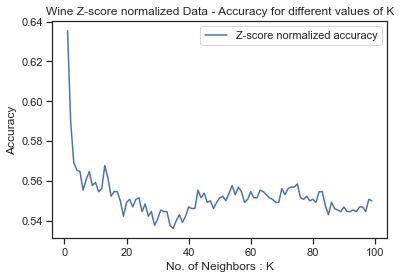

In [518]:
# Generate plot
n = range(1,100)
plt.title('Wine Z-score normalized Data - Accuracy for different values of K')
plt.plot(n, test_accuracies_wine, label = 'Z-score normalized accuracy')
plt.legend()
plt.xlabel('No. of Neighbors : K')
plt.ylabel('Accuracy')
plt.show()

At K = 1, the model works best, with accuracy of 63.54%. Also it can be seen that there is no linear relationship between K and accuracy.

#### Weighted KNN : Euclidean Distance with K = 1

In [519]:
#Defining KNN model with the best found value of paramter K =1
manhattan_weighted_knn_model_wine = KNeighborsClassifier(weights='distance', n_neighbors=1, p=1)

# Fitting Train data into our model
manhattan_weighted_knn_model_wine.fit(X_train_wine,Y_train_wine)

# Predict on train data set
Y_train_pred_wine = manhattan_weighted_knn_model_wine.predict(X_train_wine)

# Predict on test data set
Y_test_pred_wine = manhattan_weighted_knn_model_wine.predict(X_test_wine)

print("The values of different metrics for our manhattan_weighted KNN model is as follows:")

print("Train Accuracy: ", accuracy_score(Y_train_wine,Y_train_pred_wine))
print("Test Accuracy:  ", accuracy_score(Y_test_wine,Y_test_pred_wine))

The values of different metrics for our manhattan_weighted KNN model is as follows:
Train Accuracy:  1.0
Test Accuracy:   0.6307692307692307


#### Weighted KNN : Manhattan Distance with K = 1

In [520]:
#Defining KNN model with the best found value of paramter K =1
manhattan_weighted_knn_model_wine = KNeighborsClassifier(weights='distance', n_neighbors=1, p=1)

# Fitting Train data into our model
manhattan_weighted_knn_model_wine.fit(X_train_wine,Y_train_wine)

# Predict on train data set
Y_train_pred_wine = manhattan_weighted_knn_model_wine.predict(X_train_wine)

# Predict on test data set
Y_test_pred_wine = manhattan_weighted_knn_model_wine.predict(X_test_wine)

print("The values of different metrics for our manhattan_weighted KNN model is as follows:")

print("Train Accuracy: ", accuracy_score(Y_train_wine,Y_train_pred_wine))
print("Test Accuracy:  ", accuracy_score(Y_test_wine,Y_test_pred_wine))

The values of different metrics for our manhattan_weighted KNN model is as follows:
Train Accuracy:  1.0
Test Accuracy:   0.6307692307692307


#### Checking training and testing accuracies for Default weighted KNN

In [521]:
# Defining KNN model with the default parameters
default_weighted_knn_model_wine = KNeighborsClassifier()

# Fitting Train data into our model
default_weighted_knn_model_wine.fit(X_train_wine,Y_train_wine)

# Predict on train data set
Y_train_pred_wine = default_weighted_knn_model_wine.predict(X_train_wine)

# Predict on test data set
Y_test_pred_wine = default_weighted_knn_model_wine.predict(X_test_wine)

print("The values of different metrics for our default_weighted KNN model is as follows:")

print("Train Accuracy: ", accuracy_score(Y_train_wine,Y_train_pred_wine))
print("Test Accuracy:  ", accuracy_score(Y_test_wine,Y_test_pred_wine))

The values of different metrics for our default_weighted KNN model is as follows:
Train Accuracy:  0.7011737540888975
Test Accuracy:   0.5646153846153846


### Part 4 : Weighted KNN
#### Checking the KNN classifier with default parameters for each value of K

In [548]:
# List of accuracy scores for each value of K
test_accuracies_wine_0 = []
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    knn_classifier_wine = KNeighborsClassifier(n)
    knn_classifier_wine.fit(X_train_wine,Y_train_wine)
    Y_test_pred_wine = knn_classifier_wine.predict(X_test_wine)
    test_accuracies_wine_0.append(accuracy_score(Y_test_wine, Y_test_pred_wine))

#### Checking the KNN classifier with Euclidean distance for each value of K

In [543]:
# List of accuracy scores for each value of K
test_accuracies_wine_1 = []
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    knn_classifier_euclidean_wine = KNeighborsClassifier(weights='distance', n_neighbors=n, p=2)
    knn_classifier_euclidean_wine.fit(X_train_wine,Y_train_wine)
    Y_test_pred_wine = knn_classifier_euclidean_wine.predict(X_test_wine)
    test_accuracies_wine_1.append(accuracy_score(Y_test_wine, Y_test_pred_wine))

#### Checking the KNN classifier with Manhattan distance for each value of K

In [544]:
# List of accuracy scores for each value of K
test_accuracies_wine_2 = []
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    knn_classifier_manhattan_wine = KNeighborsClassifier(weights='distance', n_neighbors=n, p=1)
    knn_classifier_manhattan_wine.fit(X_train_wine,Y_train_wine)
    Y_test_pred_wine = knn_classifier_manhattan_wine.predict(X_test_wine)
    test_accuracies_wine_2.append(accuracy_score(Y_test_wine, Y_test_pred_wine))

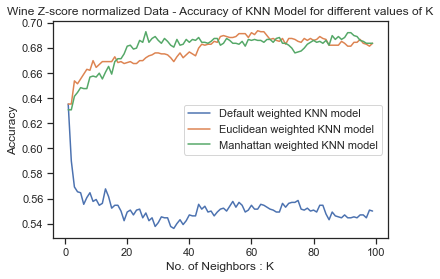

In [545]:
# Generate plot
n = range(1,100)
plt.title('Wine Z-score normalized Data - Accuracy of KNN Model for different values of K')
plt.plot(n, test_accuracies_wine_0, label = 'Default weighted KNN model')
plt.plot(n, test_accuracies_wine_1, label = 'Euclidean weighted KNN model')
plt.plot(n, test_accuracies_wine_2, label = 'Manhattan weighted KNN model')
plt.legend()
plt.xlabel('No. of Neighbors : K')
plt.ylabel('Accuracy')
plt.show()

In [551]:
print("Max accuracy for default :",max(test_accuracies_wine_0[0:])*100,"% K value:",k_value[np.where(test_accuracies_wine_0 == max(test_accuracies_wine_0[1:]))][0])
print("Max accuracy for euclid:",max(test_accuracies_wine_1[0:])*100,"% K value:",k_value[np.where(test_accuracies_wine_1 == max(test_accuracies_wine_1[1:]))][0])
print("Max accuracy for manhattan :",max(test_accuracies_wine_2[0:])*100,"% K value:",k_value[np.where(test_accuracies_wine_2 == max(test_accuracies_wine_2[1:]))][0])

Max accuracy for default : 63.53846153846155 % K value: 1.0
Max accuracy for euclid: 69.38461538461539 % K value: 61.0
Max accuracy for manhattan : 69.3076923076923 % K value: 25.0


Best value for Default weighted KNN model is K = 1, with accuracy 63.54%.
Best value for Euclidean weighted KNN model is K = 61, with accuracy 69.38%.
Best value for Manhattan weighted KNN model is K = 25, with accuracy 69.31%

### Part 5: Ablation studies for Wine dataset

#### Checking for default parameters of KNN classifier

In [528]:
# This is the unnormalized data
unnormalized_data = wine

Y_wine = unnormalized_data['quality']
X_wine = unnormalized_data.drop(columns='quality')

X_train, X_test, Y_train, Y_test = train_test_split(X_wine, Y_wine, test_size=0.2, random_state=27)

# Define default KNN Classifier
KNN_model = KNeighborsClassifier()

# Fit train data into the model
KNN_model.fit(X_train, Y_train)

# Get parameters of the model
print("The default parameters for KNeighborClassifier is as follows:")
KNN_model.get_params()

The default parameters for KNeighborClassifier is as follows:


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Checking the testing and training accuracies for default model for Wine dataset

In [529]:
# Prediction on train set
Y_train_pred = KNN_model.predict(X_train)

# Prediction on test set
Y_test_pred = KNN_model.predict(X_test)

# Train Accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)

#Test Accuracy
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy of this model is :",train_accuracy)
print("Test Accuracy of this model is :",test_accuracy)

Train Accuracy of this model is : 0.6424860496440254
Test Accuracy of this model is : 0.4753846153846154


#### Checking for best value of K for default KNN classifier for un-normalized wine data

In [552]:
# List of accuracy scores for each value of K
test_accuracies_wine_0 = []
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    knn_classifier_wine = KNeighborsClassifier(n)
    knn_classifier_wine.fit(X_train,Y_train)
    Y_test_pred = knn_classifier_wine.predict(X_test)
    test_accuracies_wine_0.append(accuracy_score(Y_test, Y_test_pred))

#### Checking the testing accuracies for KNN model (Euclidean distance) for Wine dataset

In [553]:
# List of accuracy scores for each value of K
test_accuracies_wine_1 = []
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    knn_classifier_euclidean_wine = KNeighborsClassifier(weights='distance', n_neighbors=n, p=2)
    knn_classifier_euclidean_wine.fit(X_train,Y_train)
    Y_test_pred = knn_classifier_euclidean_wine.predict(X_test)
    test_accuracies_wine_1.append(accuracy_score(Y_test, Y_test_pred))

#### Checking the testing accuracies for KNN model (Manhattan distance) for Wine dataset

In [554]:
# List of accuracy scores for each value of K
test_accuracies_wine_2 = []
k_value = np.empty(100)

# Train Model for each value of K
for n in range(1,100):
    k_value[n] = n
    knn_classifier_manhattan_wine = KNeighborsClassifier(weights='distance', n_neighbors=n, p=1)
    knn_classifier_manhattan_wine.fit(X_train,Y_train)
    Y_test_pred = knn_classifier_manhattan_wine.predict(X_test)
    test_accuracies_wine_2.append(accuracy_score(Y_test_wine, Y_test_pred))

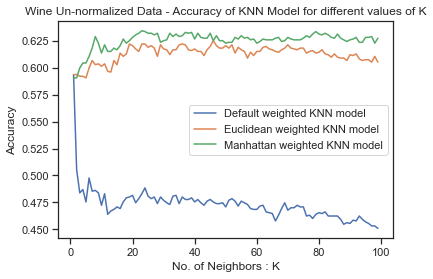

In [556]:
# Generate plot
n = range(1,100)
plt.title('Wine Un-normalized Data - Accuracy of KNN Model for different values of K')
plt.plot(n, test_accuracies_wine_0, label = 'Default weighted KNN model')
plt.plot(n, test_accuracies_wine_1, label = 'Euclidean weighted KNN model')
plt.plot(n, test_accuracies_wine_2, label = 'Manhattan weighted KNN model')
plt.legend()
plt.xlabel('No. of Neighbors : K')
plt.ylabel('Accuracy')
plt.show()

In [557]:
print("Max accuracy for default :",max(test_accuracies_wine_0[0:])*100,"% K value:",k_value[np.where(test_accuracies_wine_0 == max(test_accuracies_wine_0[1:]))][0])
print("Max accuracy for euclid:",max(test_accuracies_wine_1[0:])*100,"% K value:",k_value[np.where(test_accuracies_wine_1 == max(test_accuracies_wine_1[1:]))][0])
print("Max accuracy for manhattan :",max(test_accuracies_wine_2[0:])*100,"% K value:",k_value[np.where(test_accuracies_wine_2 == max(test_accuracies_wine_2[1:]))][0])

Max accuracy for default : 59.38461538461538 % K value: 1.0
Max accuracy for euclid: 62.53846153846154 % K value: 45.0
Max accuracy for manhattan : 63.46153846153846 % K value: 22.0


Best value for Default weighted KNN model is K = 1, with accuracy 59.38%.
Best value for Euclidean weighted KNN model is K = 45, with accuracy 62.54%.
Best value for Manhattan weighted KNN model is K = 22, with accuracy 63.46%

**This shows that normalization in this case does indeed make a major impact on the prediction accuracy. The accuracy we got for normalized data was 69.38% with k = 62, and for unnormalized data accuracy is 63.46% with k = 23. Hence normalization is necessary for this dataset**

<h1> Refrences

<ul>
    <li> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html </li>
    <li> https://matplotlib.org/ </li>
    <li> https://seaborn.pydata.org/ </li>
    <li> https://archive.ics.uci.edu/ml/datasets/abalone </li>
    <li> https://archive.ics.uci.edu/ml/datasets/wine </li>
    <li> https://towardsdatascience.com/normalization-standardization-and-normal-distribution-bfbe14e12df0
    <li> 657A assignment A0, student notebooks for wine data preprocessing
</ul>